In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV
%matplotlib inline


## Classification et déséquilibre de classes

Pour fixer les idées, on suppose que l'on se place dans le cas suivant :
* Vous êtes un ingénieur conseil pour une quelconque entreprise du big 4, mandaté pour créer un modèle capable de détecter des personnes atteintes d'une maladie contagieuse pour les isoler dès que possible.
* On considère que 2.5% de faux négatifs est acceptable car la contagiosité ne posera pas de grave problème au delà.
* Le taux de faux positifs doit être limité car les places dans les hopitaux sont en nombre réduit. On estime qu'il est acceptable d'avoir au plus 7.5% de faux positifs.

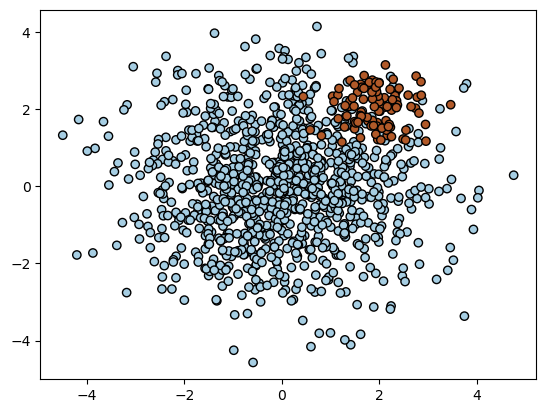

In [17]:
# 2 groupes, 100 vs 1000
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")


Appliquez un SVM Classifier (SVC) sur les données X et y.


In [18]:
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)


SVC(kernel='linear')

Les classes sont déséquilibrées. Quel ratio y a t il entre les population.

Existe t il un argument de SVC qui permettrait "d'équilibrer" les classes ?


In [19]:
wclf = svm.SVC(kernel="linear", C=1.0)  # COMPLETEME, il manque quelque chose
wclf.fit(X, y)


SVC(kernel='linear')

Le code suivant affiche les frontières de décision. Conclusions sur l'utilité d'équilibrer les classes ?


In [20]:
if np.allclose(clf.coef_, wclf.coef_):
    print("Complétez les questions au dessus.")
else:
    fig, ax = plt.subplots(1, 2)
    # plot the decision functions for both classifiers
    for ax, estimator, legend in zip(ax, [clf, wclf], ["non pondéré", "pondéré"]):
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
        disp = DecisionBoundaryDisplay.from_estimator(
            estimator,
            X,
            plot_method="contour",
            colors="k",
            levels=[0],
            alpha=0.5,
            linestyles=["-"],
            ax=ax,
        )
        ax.set_title(f"Cas {legend}")


Complétez les questions au dessus.


Même question mais en utilisant `classification_report`


In [21]:
# COMPLETEME


Même question avec `confusion_matrix` et `ConfusionMatrixDisplay`

_Indication : essayez de comparer avec et sans normalisation de la matrice de confusion_


In [22]:
# COMPLETEME - matrices de confusion


## Classification et classes déséquilibrées et SVM à noyau

Reprendre l'exercice précédent en utilisant un SVM à noyau.


In [23]:
# COMPLETEME, avec ce qu'il y a au dessus.


## Cross Validation et GridSearch

Le but de cette partie est d'utiliser les méthodes de cross-validation et de GridSearch pour identifier les meilleurs paramètres, où l'on se limitera à :

- Le noyau (linéaire ou RBF)
- C, le paramètre de marge souple
- $\gamma$, le coefficient donnant la "largeur" du noyau.

A partir des meilleurs paramètres, comparer l'estimateur obtenu à ceux obtenus dans les questions précédentes.
Si disponible, comparez le Grid-Search avec le Halving Grid-Search.

En particulier, on utilisera une méthode de validation croisée pour vérifier les capacités de tous les modèles testés.


In [24]:
# COMPLETEME GridSearch


In [25]:
# COMPLETEME HalvingGridSearch


In [26]:
# COMPLETEME visualisation et analyse
